In [2]:
#Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

**Data Source**

https://www.kaggle.com/datasets/whenamancodes/predict-diabities

**About**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.2 From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).

**Data Dictionary**

|          Columns         |                    Description                   |
|:------------------------:|:------------------------------------------------:|
| Pregnancies              | Number of pregnancies             |
| Glucose                  | To express the Glucose level in blood            |
| BloodPressure            | To express the Blood pressure measurement        |
| SkinThickness            | To express the thickness of the skin             |
| Insulin                  | To express the Insulin level in blood            |
| BMI                      | To express the Body mass index                   |
| DiabetesPedigreeFunction | To express the Diabetes probability according to family history              |
| Age                      | To express the age                               |
| Outcome                  | To express the final result 1 is Yes and 0 is No |

In [3]:
path = '/content/diabetes.csv'
df = pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Limpieza de datos

In [4]:
#Check duplicates
df.duplicated().sum()

0

In [5]:
#Check missing values
print('Columns with null values:\n', df.isnull().sum())
print("-"*10)

df.describe(include = 'all').round(2)

Columns with null values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
----------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [6]:
#Check categorias
print('Valores unicos por columna')
df.nunique()

Valores unicos por columna


Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

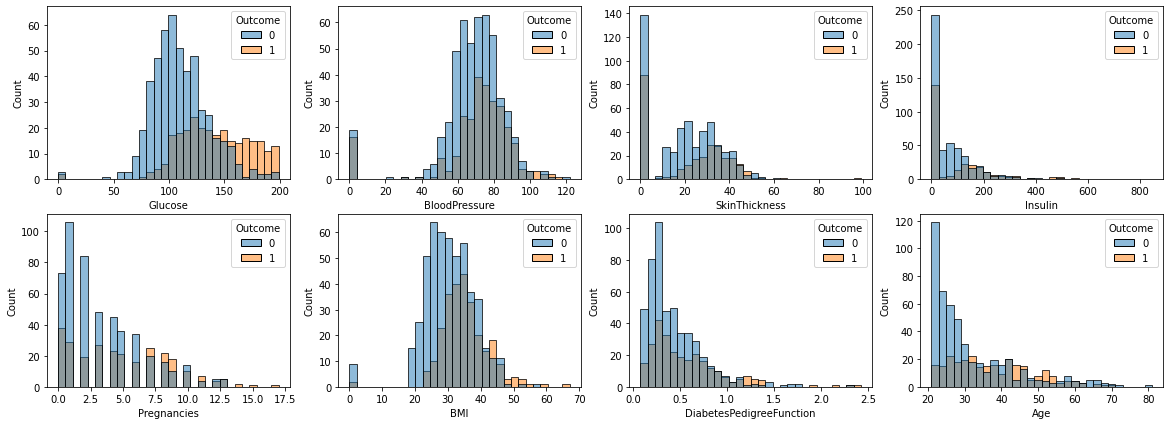

In [7]:
#Check distribucion de la data
plt.figure(figsize=(20, 7))

plt.subplot(2, 4, 1);
sns.histplot(data=df, x="Glucose", bins = 30,hue="Outcome");

plt.subplot(2, 4, 2);
sns.histplot(data=df, x="BloodPressure", bins = 30,hue="Outcome");

plt.subplot(2, 4, 3);
sns.histplot(data=df, x="SkinThickness", bins = 30,hue="Outcome");

plt.subplot(2, 4, 4);
sns.histplot(data=df, x="Insulin", bins = 30,hue="Outcome");

plt.subplot(2, 4, 5);
sns.histplot(data=df, x="Pregnancies", bins = 30,hue="Outcome");

plt.subplot(2, 4, 6);
sns.histplot(data=df, x="BMI", bins = 30,hue="Outcome");

plt.subplot(2, 4, 7);
sns.histplot(data=df, x="DiabetesPedigreeFunction", bins = 30,hue="Outcome");

plt.subplot(2, 4, 8);
sns.histplot(data=df, x="Age", bins = 30,hue="Outcome");

In [8]:
print('Count Os en cada columna')
print('Glucose',df['Glucose'].value_counts()[0])
print('BloodPressure',df['BloodPressure'].value_counts()[0])
print('SkinThickness',df['SkinThickness'].value_counts()[0])
print('Insulin',df['Insulin'].value_counts()[0])
print('BMI',df['BMI'].value_counts()[0])

Count Os en cada columna
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


In [9]:
#Reemplazar 0s en las columnas  por el mean value
Glucose_mean = df['Glucose'].mean()
df['Glucose']=df['Glucose'].replace(0, Glucose_mean)

BloodPressure_mean = df['BloodPressure'].mean()
df['BloodPressure']=df['BloodPressure'].replace(0, BloodPressure_mean)

SkinThick_mean = df['SkinThickness'].mean()
df['SkinThickness']=df['SkinThickness'].replace(0, SkinThick_mean)

Insulin_mean = df['Insulin'].mean()
df['Insulin']=df['Insulin'].replace(0, Insulin_mean)

BMI_mean = df['BMI'].mean()
df['BMI']=df['BMI'].replace(0, BMI_mean)

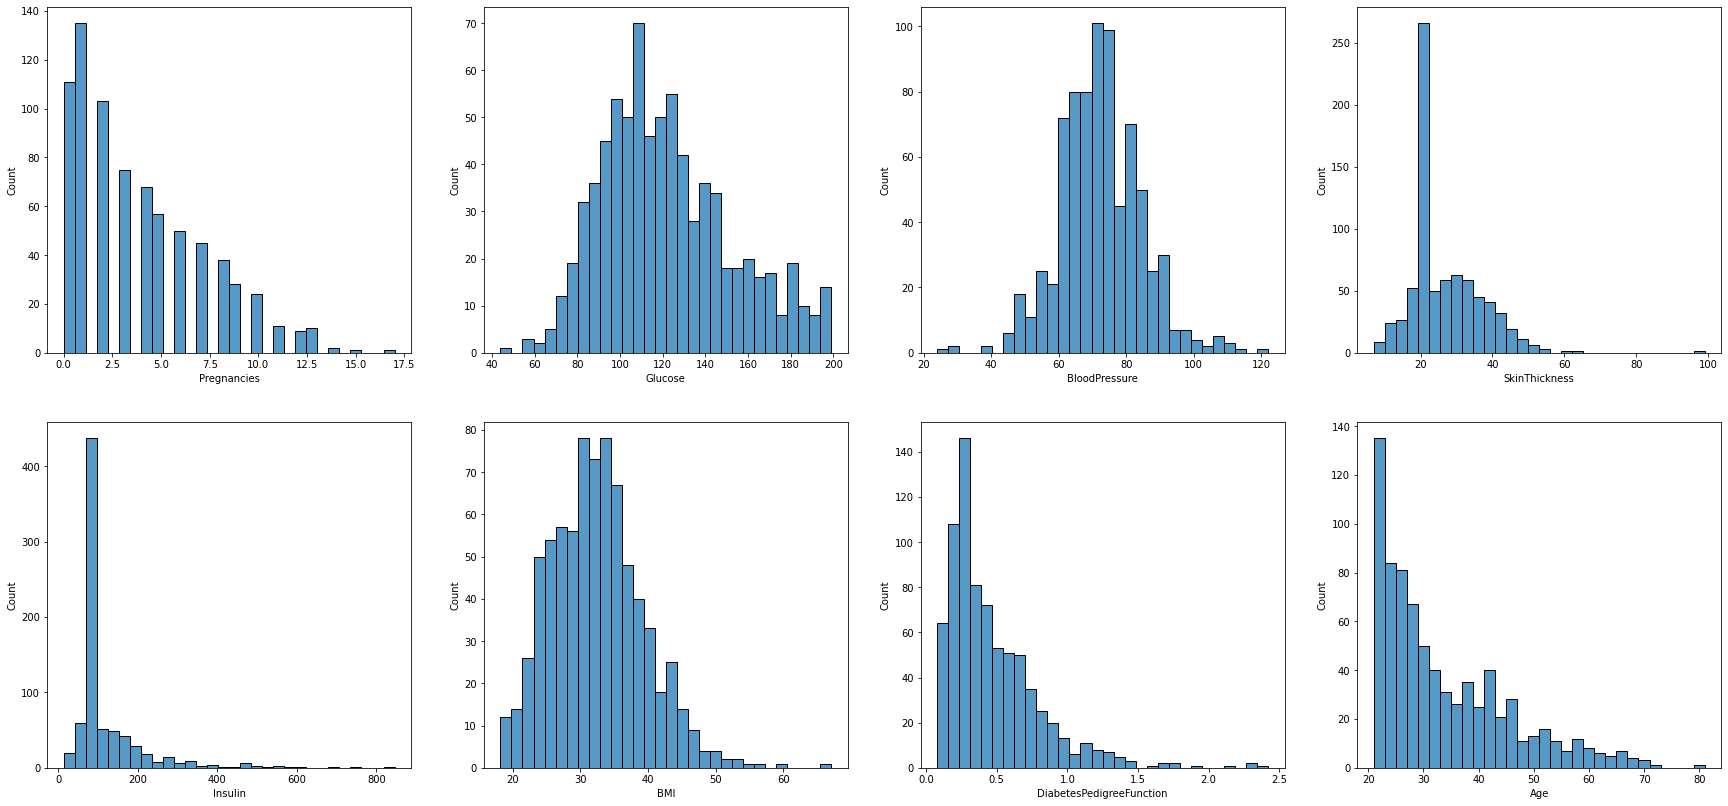

In [10]:
#Check nueva distribucion de la data
plt.figure(figsize=(30, 14))

plt.subplot(2, 4, 1);
sns.histplot(data=df, x="Pregnancies", bins = 30);

plt.subplot(2, 4, 2);
sns.histplot(data=df, x="Glucose", bins = 30);

plt.subplot(2, 4, 3);
sns.histplot(data=df, x="BloodPressure", bins = 30);

plt.subplot(2, 4, 4);
sns.histplot(data=df, x="SkinThickness", bins = 30);

plt.subplot(2, 4, 5);
sns.histplot(data=df, x="Insulin", bins = 30);

plt.subplot(2, 4, 6);
sns.histplot(data=df, x="BMI", bins = 30);

plt.subplot(2, 4, 7);
sns.histplot(data=df, x="DiabetesPedigreeFunction", bins = 30);

plt.subplot(2, 4, 8);
sns.histplot(data=df, x="Age", bins = 30);

## Analisis Exploratorio

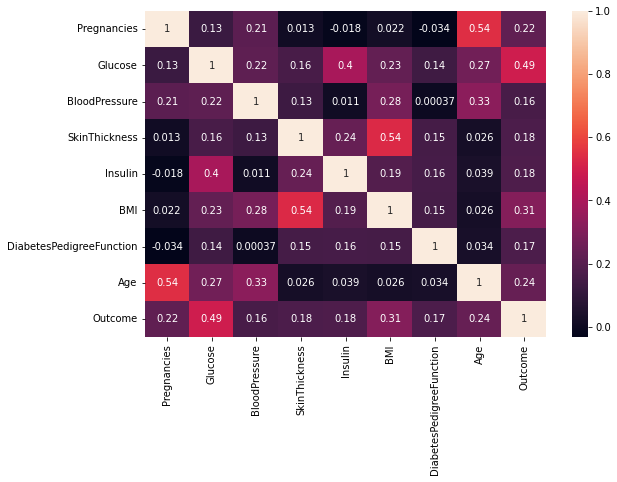

In [11]:
corr = df.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr,annot=True);

In [12]:
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.68,72.25,26.61,118.66,32.45,0.47,33.24,0.35
std,3.37,30.44,12.12,9.63,93.08,6.88,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,20.54,79.80,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,79.80,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [13]:
dfno=df[df.Outcome == 0]
dfsi=df[df.Outcome == 1]

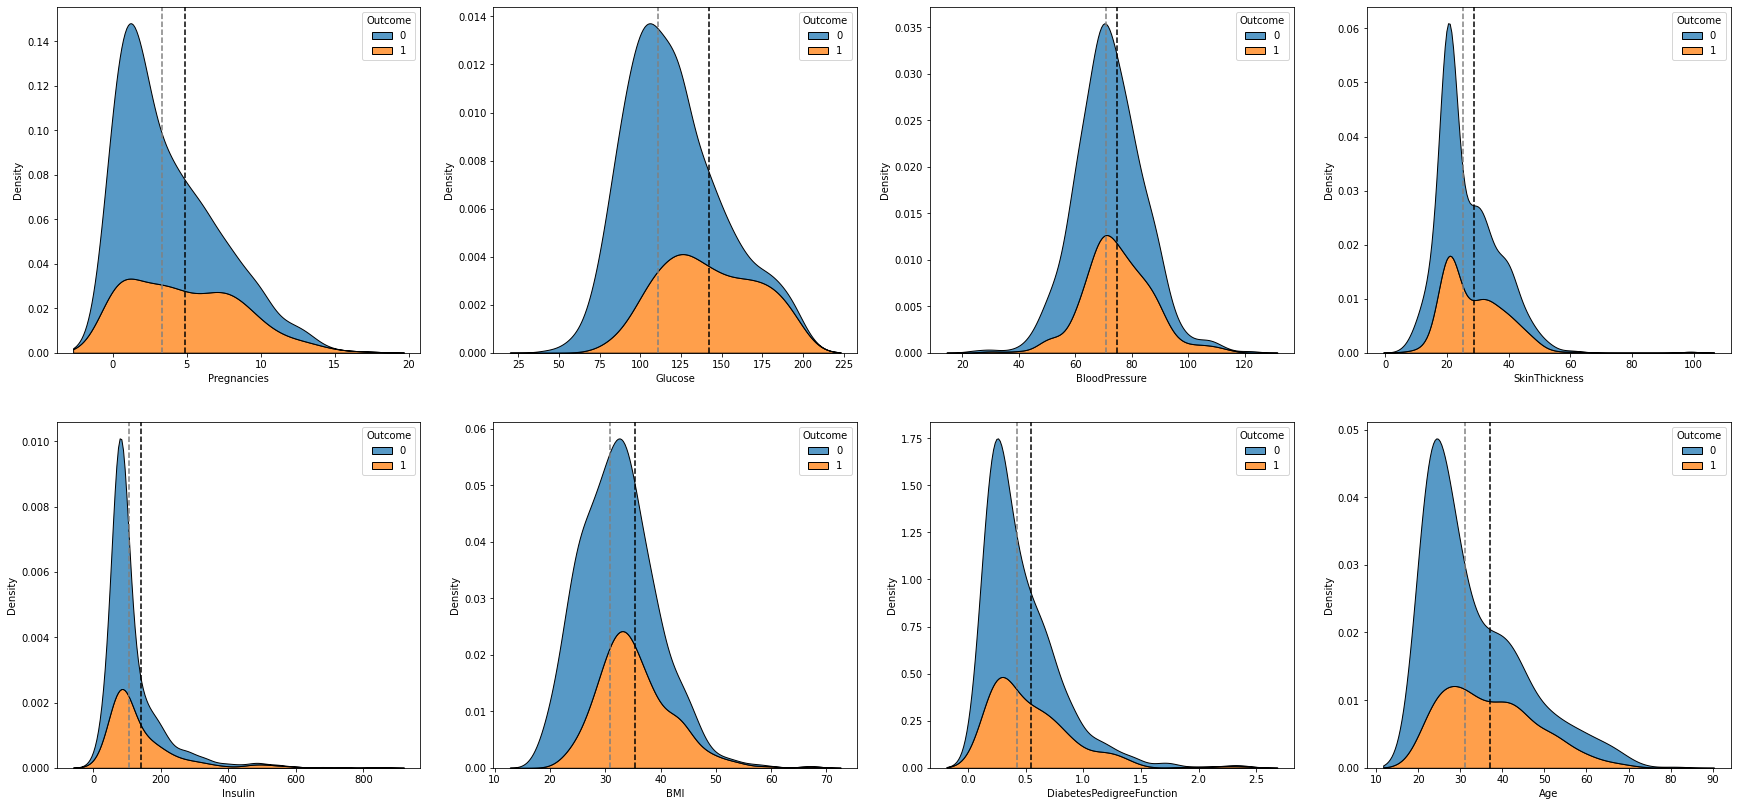

In [14]:
#Check nueva distribucion de la data
plt.figure(figsize=(30, 14))
sns.color_palette("hls", 8)

plt.subplot(2, 4, 1);
sns.kdeplot(data=df, x="Pregnancies",hue='Outcome',multiple='stack');
plt.axvline(x=dfsi.Pregnancies.mean(),ls='--',color='black')
plt.axvline(x=dfno.Pregnancies.mean(),ls='--',color='gray')

plt.subplot(2, 4, 2);
sns.kdeplot(data=df, x="Glucose",hue='Outcome',multiple='stack');
plt.axvline(x=dfsi.Glucose.mean(),ls='--',color='black')
plt.axvline(x=dfno.Glucose.mean(),ls='--',color='gray')

plt.subplot(2, 4, 3);
sns.kdeplot(data=df, x="BloodPressure",hue='Outcome',multiple='stack');
plt.axvline(x=dfsi.BloodPressure.mean(),ls='--',color='black')
plt.axvline(x=dfno.BloodPressure.mean(),ls='--',color='gray')

plt.subplot(2, 4, 4);
sns.kdeplot(data=df, x="SkinThickness",hue='Outcome',multiple='stack');
plt.axvline(x=dfsi.SkinThickness.mean(),ls='--',color='black')
plt.axvline(x=dfno.SkinThickness.mean(),ls='--',color='gray')

plt.subplot(2, 4, 5);
sns.kdeplot(data=df, x="Insulin",hue='Outcome',multiple='stack');
plt.axvline(x=dfsi.Insulin.mean(),ls='--',color='black')
plt.axvline(x=dfno.Insulin.mean(),ls='--',color='gray')

plt.subplot(2, 4, 6);
sns.kdeplot(data=df, x="BMI",hue='Outcome',multiple='stack');
plt.axvline(x=dfsi.BMI.mean(),ls='--',color='black')
plt.axvline(x=dfno.BMI.mean(),ls='--',color='gray')

plt.subplot(2, 4, 7);
sns.kdeplot(data=df, x="DiabetesPedigreeFunction",hue='Outcome',multiple='stack');
plt.axvline(x=dfsi.DiabetesPedigreeFunction.mean(),ls='--',color='black')
plt.axvline(x=dfno.DiabetesPedigreeFunction.mean(),ls='--',color='gray')

plt.subplot(2, 4, 8);
sns.kdeplot(data=df, x="Age",hue='Outcome',multiple='stack');
plt.axvline(x=dfsi.Age.mean(),ls='--',color='black')
plt.axvline(x=dfno.Age.mean(),ls='--',color='gray')

plt.show();

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [16]:
#Check distribution of the outcome
df['Outcome'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

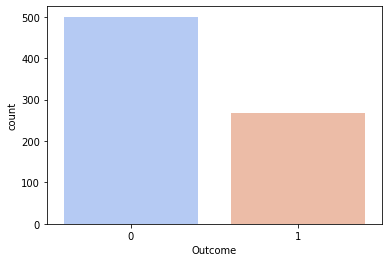

In [17]:
sns.countplot(data=df,x='Outcome',fill='False',palette='coolwarm');

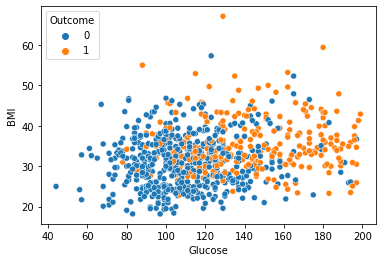

In [18]:
sns.scatterplot(data=df,x='Glucose',y='BMI',hue='Outcome');

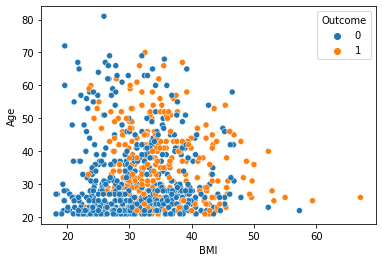

In [43]:
sns.scatterplot(data=df,x='BMI',y='Age',hue='Outcome');

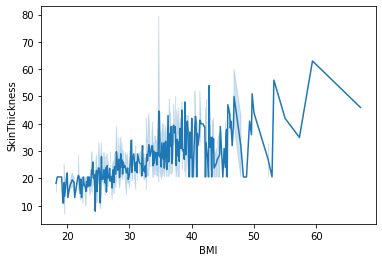

In [38]:
sns.lineplot(data=df,x='BMI',y='SkinThickness');

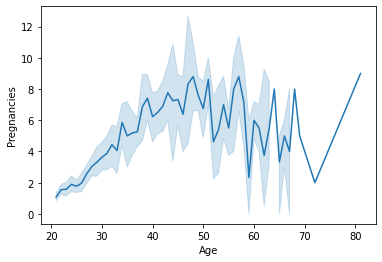

In [42]:
sns.lineplot(data=df,x='Age',y='Pregnancies');

## Modelo

In [20]:
X = df.drop(columns = 'Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Logistic Regresion

In [21]:
#Logistic Regression
logreg = LogisticRegression()
scaler = StandardScaler()
logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [22]:
#Metrics
y_pred = logreg_pipe.predict(X_test)
print('Accuracy',[round(accuracy_score(y_test,y_pred),4)])
print('Recall',[round(recall_score(y_test,y_pred,average="macro"),4)])
print('Precision',[round(precision_score(y_test,y_pred,average="macro"),4)])
print('fscore',[round(f1_score(y_test,y_pred,average="macro"),4)])

Accuracy [0.7344]
Recall [0.7068]
Precision [0.711]
fscore [0.7087]


In [23]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[99, 24],
       [27, 42]])

KNN

In [24]:
#KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [25]:
#Metrics
y_pred = knn_pipe.predict(X_test)
print('Accuracy',[round(accuracy_score(y_test,y_pred),4)])
print('Recall',[round(recall_score(y_test,y_pred, average="macro"),4)])
print('Precision',[round(precision_score(y_test,y_pred,average="macro"),4)])
print('fscore',[round(f1_score(y_test,y_pred,average="macro"),4)])

Accuracy [0.6302]
Recall [0.6032]
Precision [0.6014]
fscore [0.6021]


In [26]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[86, 37],
       [34, 35]])

Decision Tree Classifier

In [27]:
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=1)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [28]:
y_pred = dec_tree.predict(X_test)
print('Accuracy',[round(accuracy_score(y_test,y_pred),4)])
print('Recall',[round(recall_score(y_test,y_pred, average="macro"),4)])
print('Precision',[round(precision_score(y_test,y_pred,average="macro"),4)])
print('fscore',[round(f1_score(y_test,y_pred,average="macro"),4)])

Accuracy [0.7135]
Recall [0.6651]
Precision [0.688]
fscore [0.6711]


In [29]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[103,  20],
       [ 35,  34]])

Random Forest Classifier

In [30]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = rf.predict(X_test)
print('Accuracy',[round(accuracy_score(y_test,y_pred),4)])
print('Recall',[round(recall_score(y_test,y_pred, average="macro"),4)])
print('Precision',[round(precision_score(y_test,y_pred,average="macro"),4)])
print('fscore',[round(f1_score(y_test,y_pred,average="macro"),4)])

Accuracy [0.7604]
Recall [0.7494]
Precision [0.7412]
fscore [0.7444]


In [32]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[97, 26],
       [20, 49]])

Presentation Link [Here](https://docs.google.com/presentation/d/1Y6aKF00f2at0osHG3x-DO9kv5JxGl4BxJ0ACr0bRp1E/edit#slide=id.p)